## Part I - Prosper Loan Dataset Exploration and Visualization 
##### by Eliud Njoki

## Introduction
This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

## Preliminary Wrangling


In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# to help with displaying all rows in pandas output
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [4]:
loan_df = pd.read_csv('../data/prosperLoanData.csv')
loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

#### Dataset structure

In [5]:
loan_df.shape

(113937, 81)

#### Main feature(s) of in your dataset

In [6]:
loan_df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

#### Main feature(s) of interest in your dataset

The features I consider important include:
- Occupation
- LoanStatus
- Term

I want to know how these features impact ones ability to get a loan and the terms for these loans if possible. These features are importnat in helping the bank understadn how it serves teh differnt industries and who most of its clients on loans are and what they do. As a borrower, ti also allows me to estimate what term I woudl get if I applied for a loan in the bank

#### Features to use in investigation of features of interest

- MonthlyLoanPayment
- StatedMontlyIncome
- LoanStatus

In [7]:
loan_df.isnull().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

In [8]:
loan_df.dtypes

ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64
IsBorrowerHom

The dataset contains some missing values which we can impute using mean. This is in an effor to carry out the data cleanign process. 

In [9]:
# copy of the dataset
ploans = loan_df.copy()

# use a function to fill missing numeric bvalues with mean
cols = ['EstimatedEffectiveYield', 'BorrowerAPR', 'ProsperRating (numeric)', 'EmploymentStatusDuration', 'ProsperScore', 'EstimatedLoss', 'EstimatedReturn']
for c in cols:
    ploans[c].fillna(ploans[c].mean(), inplace = True)


In [10]:
ploans.isnull().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                 0
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                     0
EstimatedLoss                               0
EstimatedReturn                             0
ProsperRating (numeric)                     0
ProsperRating (Alpha)                   29084
ProsperScore                                0
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                    0
IsBorrowerHomeowner               

Next I drop the duplicates that might exist in the data

In [11]:
ploans.drop_duplicates(inplace=True)
ploans.shape

(113937, 81)

## Univariate Exploration


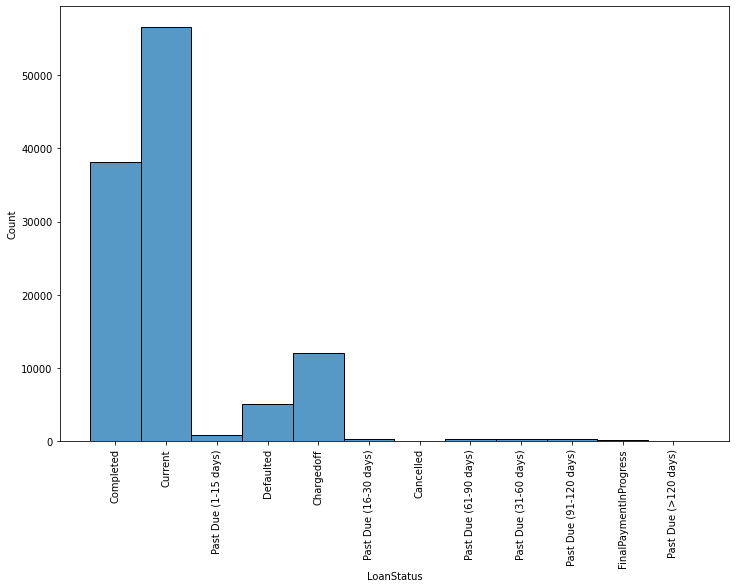

In [12]:
# plot distribution of differnt loan statuses as histogram
plt.figure(figsize=(12, 8))
# base_color = sb.color_palette()[1]
plt.xticks(rotation = 90)
sb.histplot(ploans.LoanStatus);

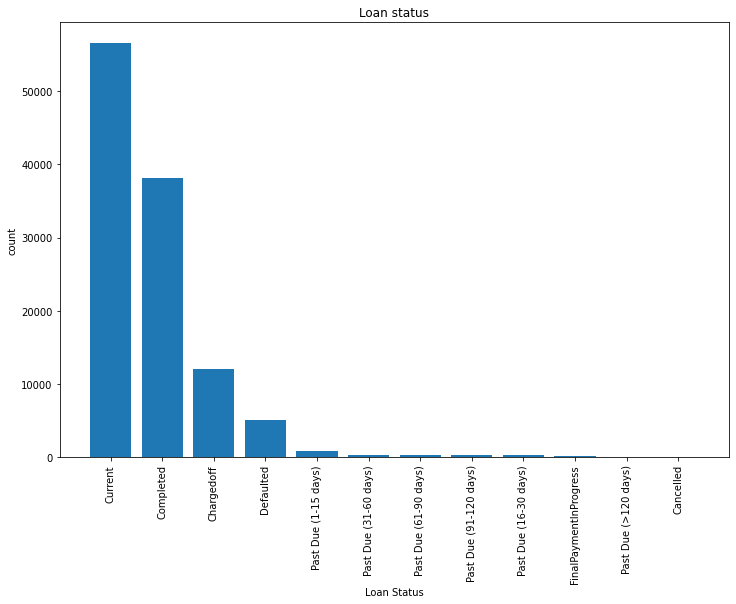

In [13]:
# loan statuses as bar plot (ordered)
plt.figure(figsize=(12,8))
lstatus = ploans['LoanStatus'].value_counts()
plt.xlabel('Loan Status')
plt.ylabel('count')
plt.title("Loan status")
plt.bar(lstatus.index, lstatus)
plt.xticks(rotation = 90);

In [14]:
def hist_plots(df):
    
    # plot dimensions
    plt.figure(figsize=(12, 8))
    
    #plot
    sb.histplot(data=df, color=base_color, kde=True);
    
    # title
    plt.title(f'''Distribution of {df}'''.title());
     

/home/tuf/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


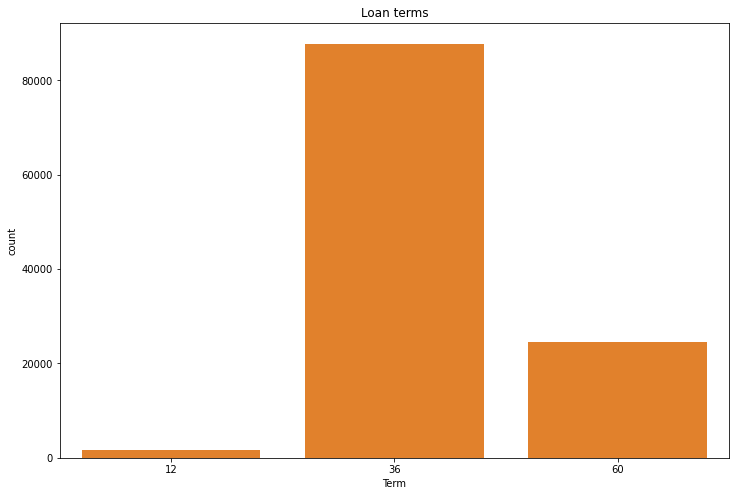

In [15]:
plt.figure(figsize=(12, 8))
base_color = sb.color_palette()[1]
plt.title('Loan terms')
sb.countplot(ploans.Term, color = base_color);

A majority of the Loans offered by the institution seem to be 36 months long followed by 60 months and 12 months beiing the least number of payment term offered

Another important feature to look at is the BorrowerAPR which is hte borrows annual percentage rate for the loan they take.

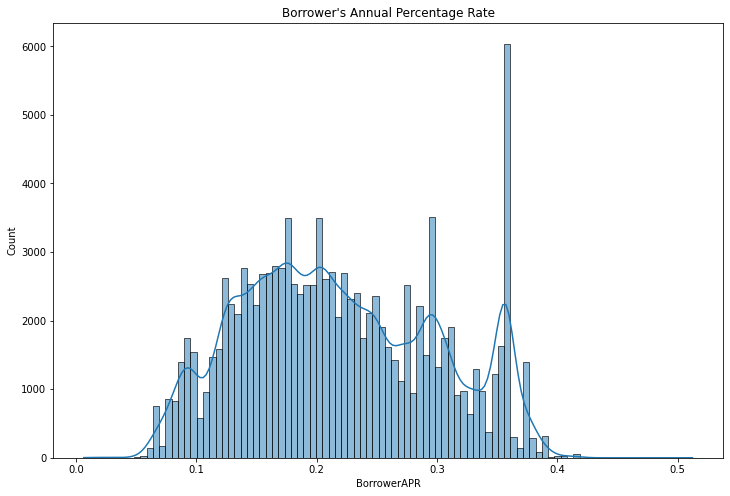

In [16]:
plt.figure(figsize=(12,8));
plt.title("Borrower's Annual Percentage Rate")
sb.histplot(ploans.BorrowerAPR, kde=True);

The Borrower's Annual percentage Rate is a normal distribution with an outlier at the tail of the distribution.

Each loan is funded by investor(s). I will look at the distribution of investors for the differnt loans.

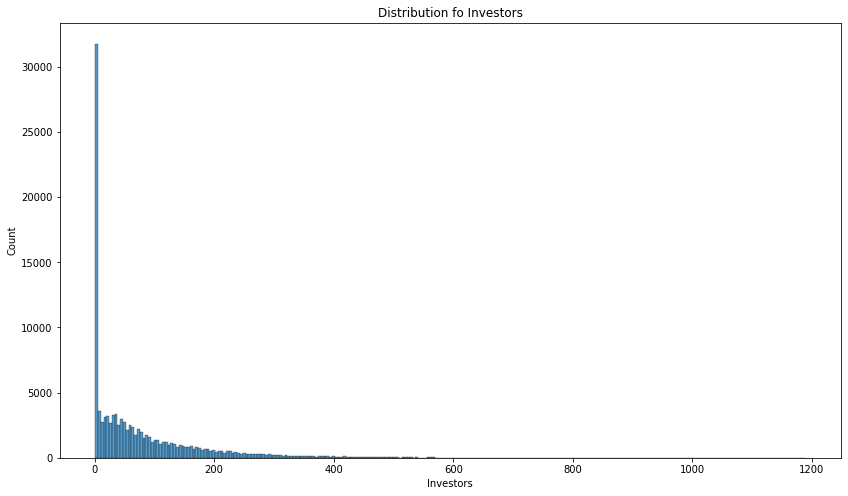

In [17]:
plt.figure(figsize=(14,8));
plt.title("Distribution fo Investors")
sb.histplot(ploans.Investors);

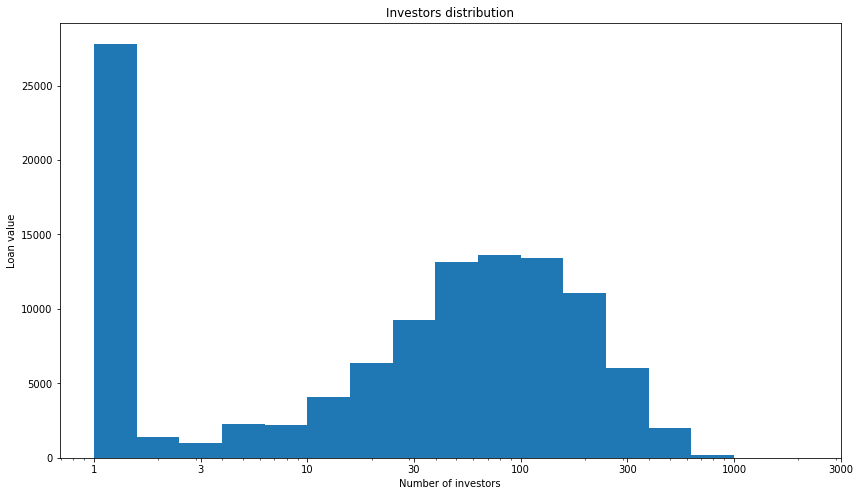

In [18]:
plt.figure(figsize=(14,8));
bins = 10**np.arange(0, np.log10(ploans['Investors'].max())+0.2, 0.2);
plt.hist(ploans['Investors'], bins = bins);
ticks = np.arange(0, np.log10(ploans['Investors'].max())+0.5, 0.5);
plt.xscale('log');
labels = [1, 3, 10, 30, 100, 300, 1000, 3000]
plt.xlabel('Number of investors')
plt.ylabel("Loan value")
plt.title("Investors distribution")
plt.xticks(10**ticks, labels);

A look at the Investors distribution shows that there is a normal distribution with some outliers (High frequencies values in some cases). A log scaling helps visualize the investor data clearly among the different loan values.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There is a general normal distribution on the variables with minor high frequency points on some fo the features such as investors who fund some loans and Borrowers APR.
> 
> A majority of the Loans offered by the institution seem to be 36 months long followed by 60 months and 12 months beiing the least number of payment term offered
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Visualizing the Investors data needed a log scalign to make the visuals clear on the distribution

## Bivariate Exploration


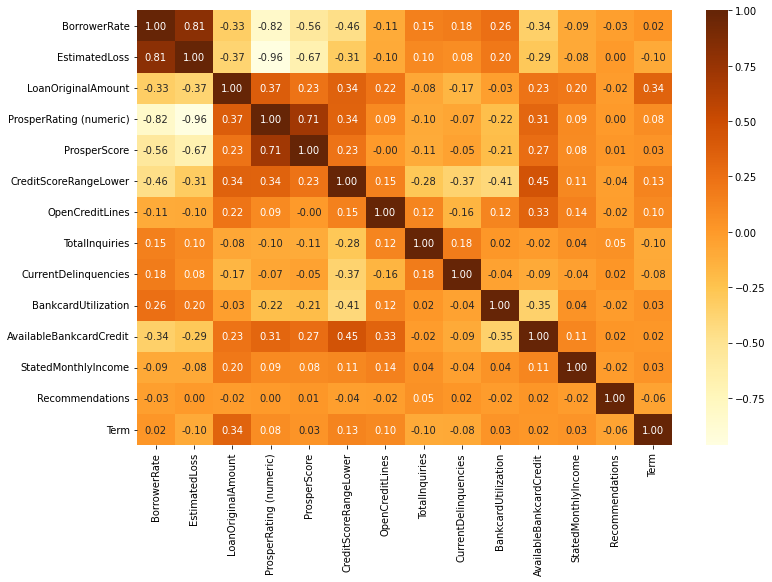

In [19]:
numeric_cols = ['BorrowerRate', 'EstimatedLoss', 'LoanOriginalAmount','ProsperRating (numeric)','ProsperScore','CreditScoreRangeLower','OpenCreditLines',
                  'ListingCreationDate','TotalInquiries','CurrentDelinquencies', 'BankcardUtilization', 
                  'AvailableBankcardCredit','IncomeRange','StatedMonthlyIncome','Recommendations','Term']
plt.figure(figsize=(12,8))
sb.heatmap(ploans[numeric_cols].corr(), xticklabels=True, yticklabels=True, annot=True, fmt = '.2f', cmap = 'YlOrBr', center=0);


- The loan term is hihgly correlated with the Loan original amount.
- The prosper rating is hihgly correlated with Borrower rate, estimated loss which indicates that the Annual percentage rate is mean to cover the estimated loss
- ProsperScore is high and CreditScoreRangeLower, BankcardUtilization are medium correlated to ProsperRating

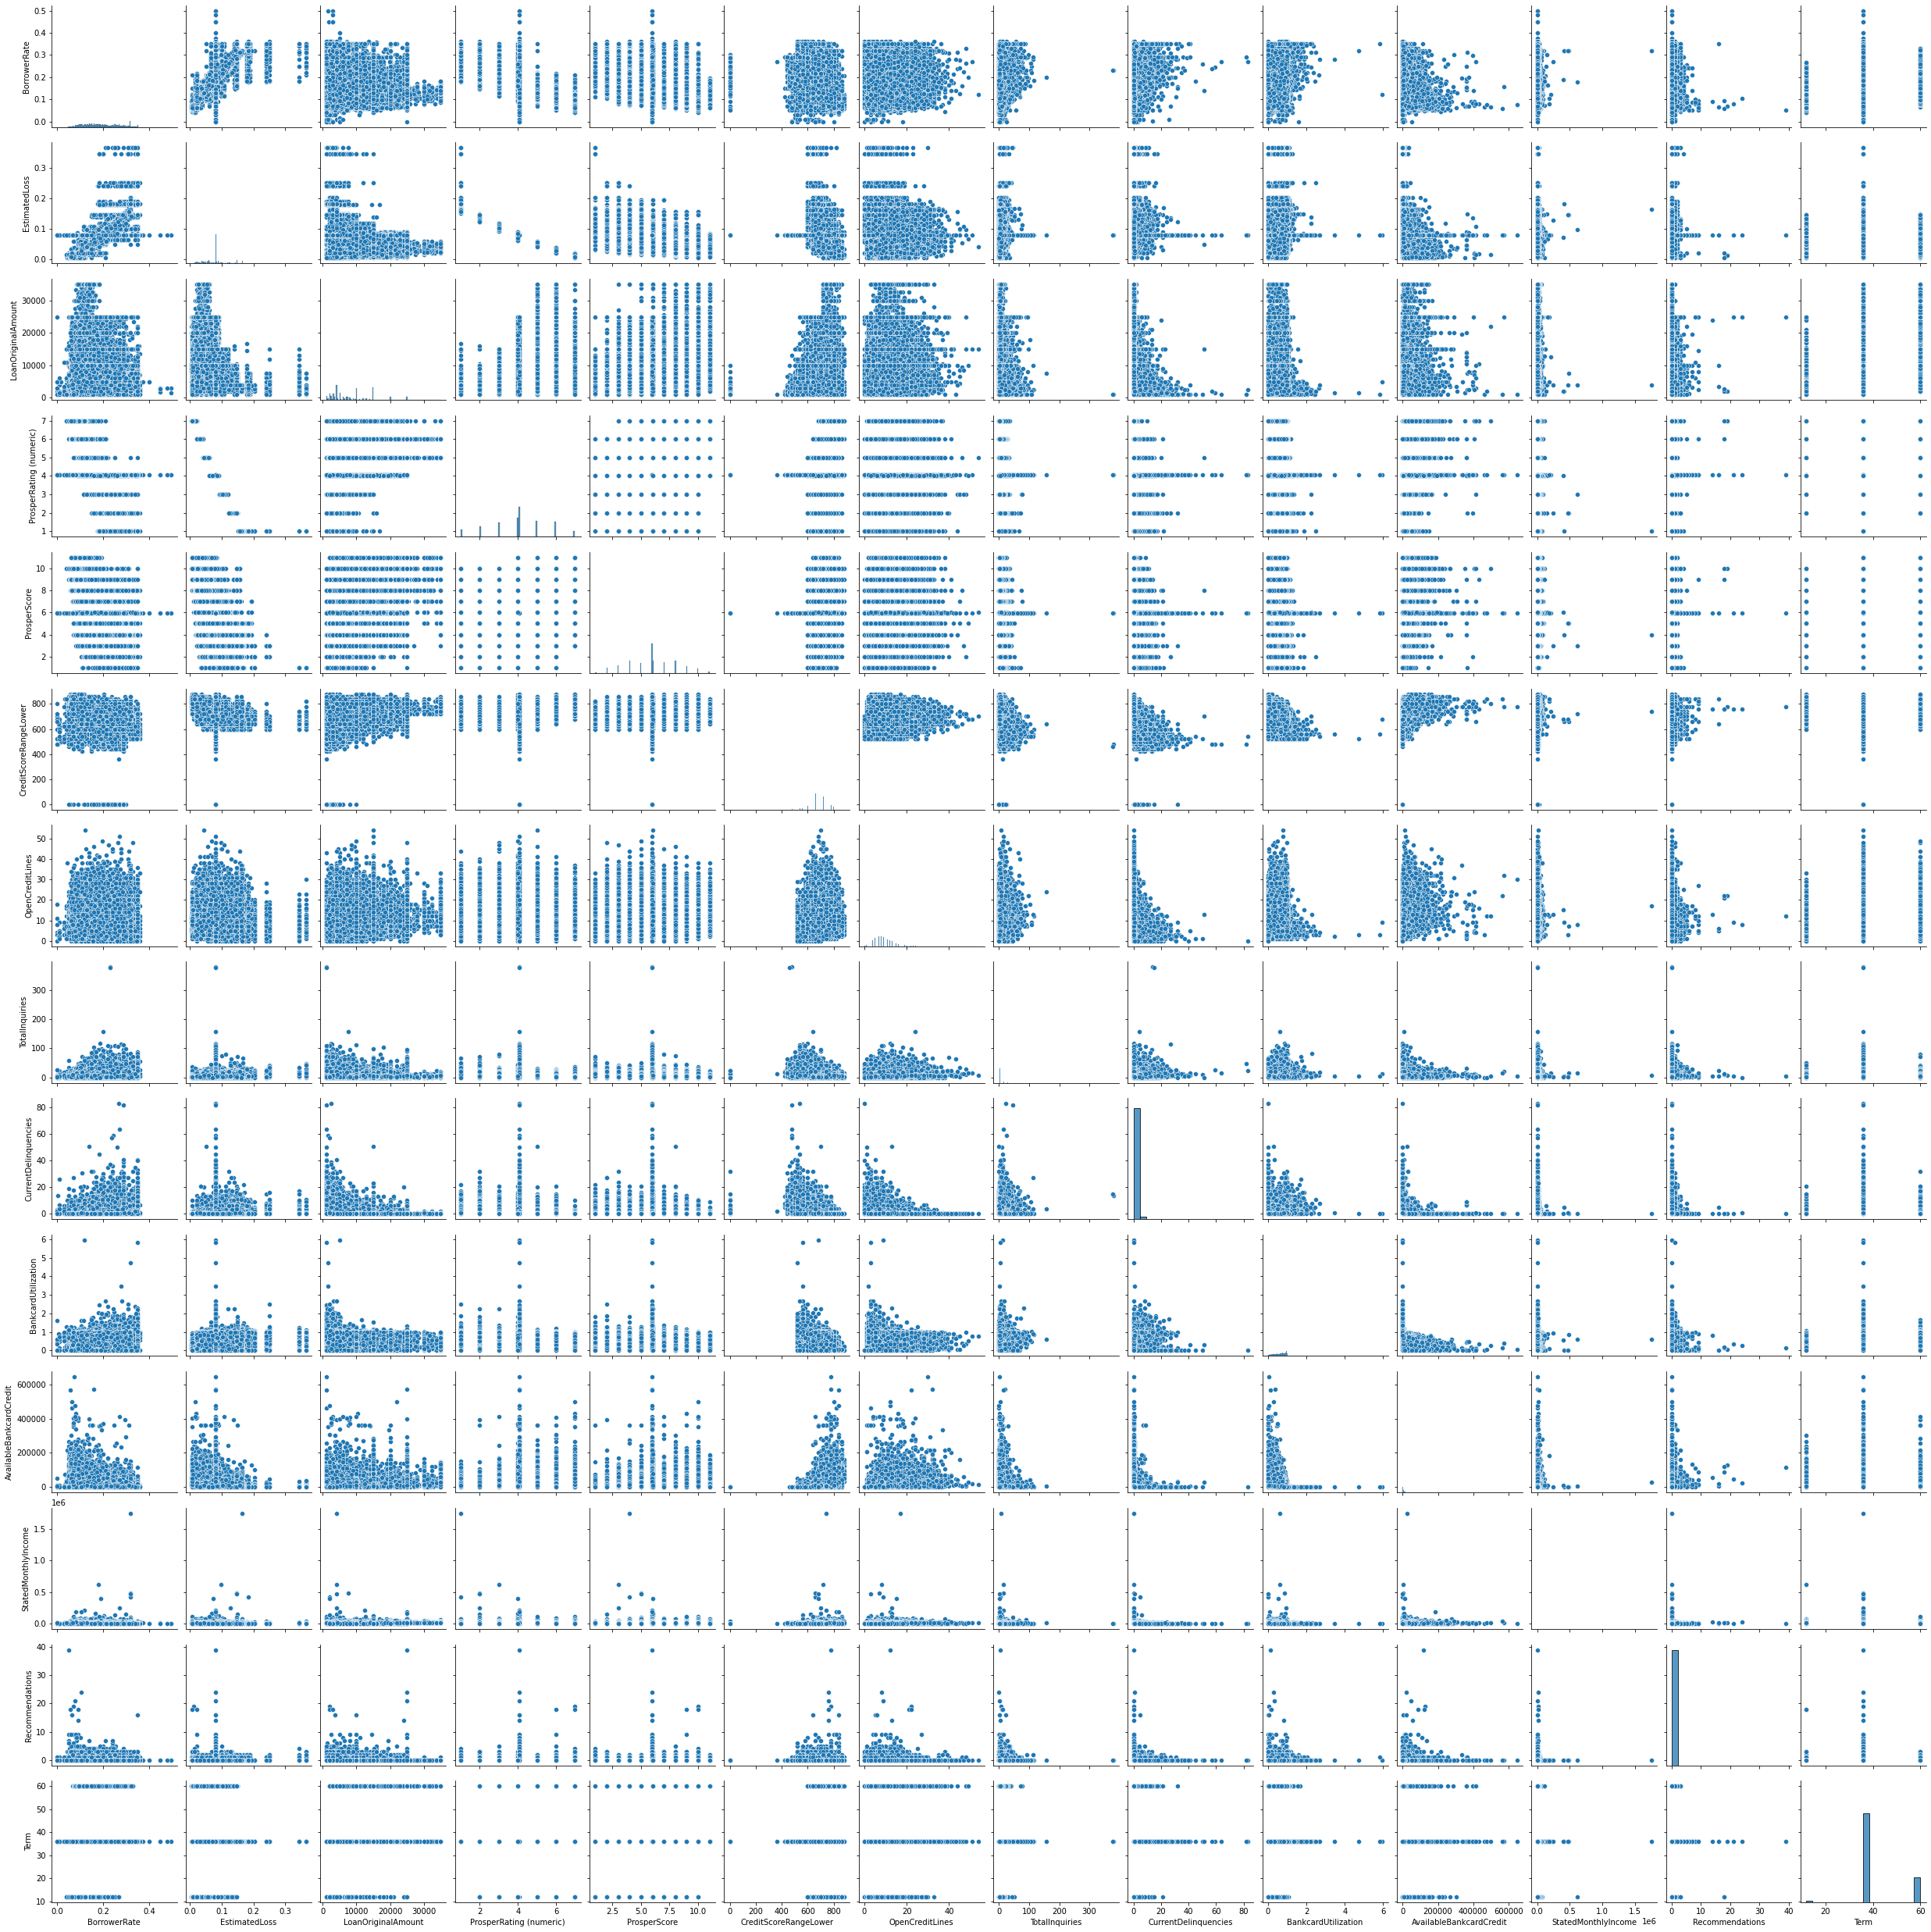

In [20]:
# scatter matrix
sb.pairplot(ploans[numeric_cols]);

Some important observations here:
- It shows again, BorrowerRate has a very strong correlation with ProsperRating.
- When the loan amount increased, the BorrowerRate and BorrowerRate volatility both decreased.
- ProsperScore and CreditScore against BorrowRate have the similar pattern.The scatter plot for credit score and Rate is opposite, APR volatility convergent when credit score decrised. The relationship of these three variables worth extra exploration.
- Although the correlation coefficient of APR and current delinquencies is not high(-0.15), the scatter plot shows that, a borrower who has a higher current delinquencies, his/her  minimum BorrowerRate will increase.
- BorrowerRate and bankcard utilization rate are roughly positive correlated. At the same time, BorrowerRate and available bankcredit are negative correlated.


One category feature fo interest is the Term variable. Let's see how it compares relates ot the BorrowerAPR and other variables

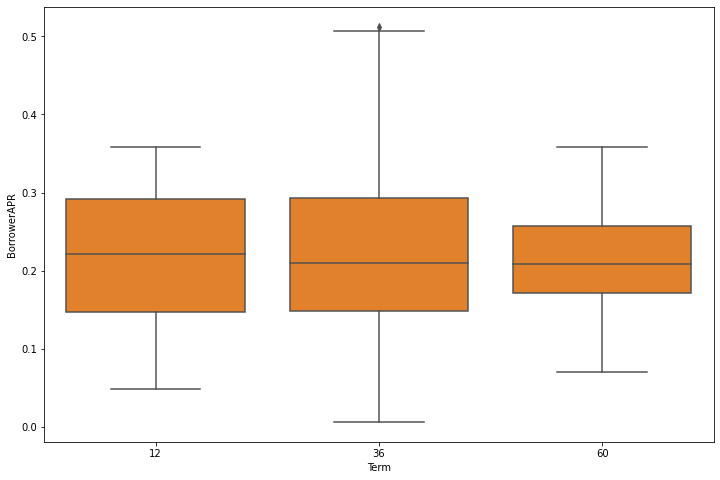

In [21]:
plt.figure(figsize=(12,8))
sb.boxplot(data = ploans, x = 'Term', y = 'BorrowerAPR', color = base_color);

- Loans with 36 months terms have the highest range of BorrowerAPRs, followed by 12 months loan terms

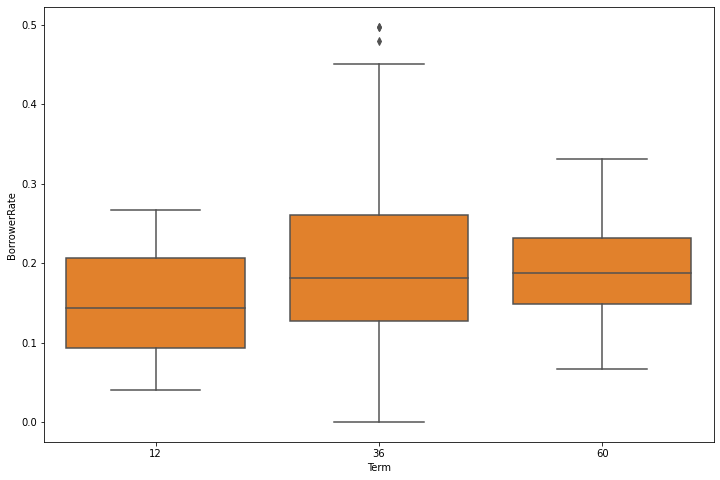

In [22]:
plt.figure(figsize=(12,8))
sb.boxplot(data = ploans, x = 'Term', y = 'BorrowerRate', color = base_color);

- Loans with 36 Months term have the highest BorrowerRate followed by 60 months loan terms

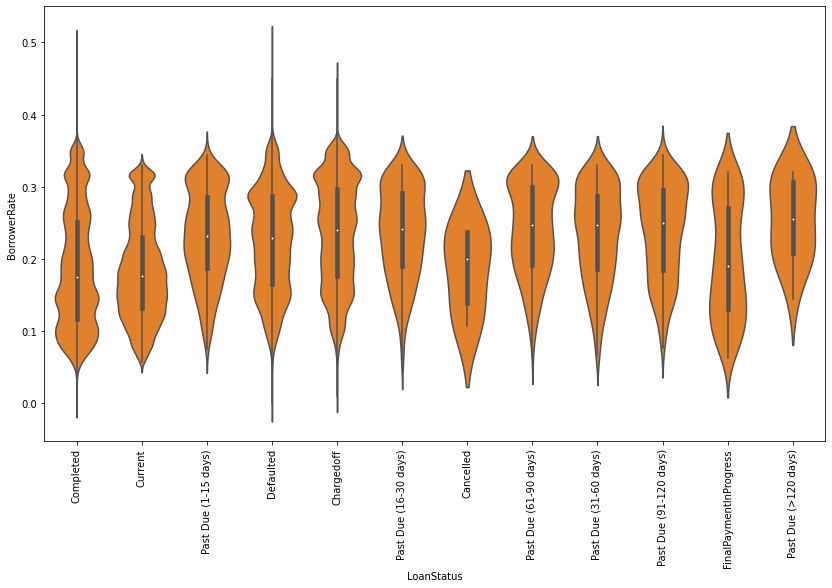

In [23]:
plt.figure(figsize=(14,8))
sb.violinplot(data = ploans, x = 'LoanStatus', y = 'BorrowerRate', color = base_color);
plt.xticks(rotation = 90);

- The borrowerRate varies slightly across the differnt loan statuses given with wide ranges on Completed, Defaulted, Chargedoff and FinalPaymentProgress loans

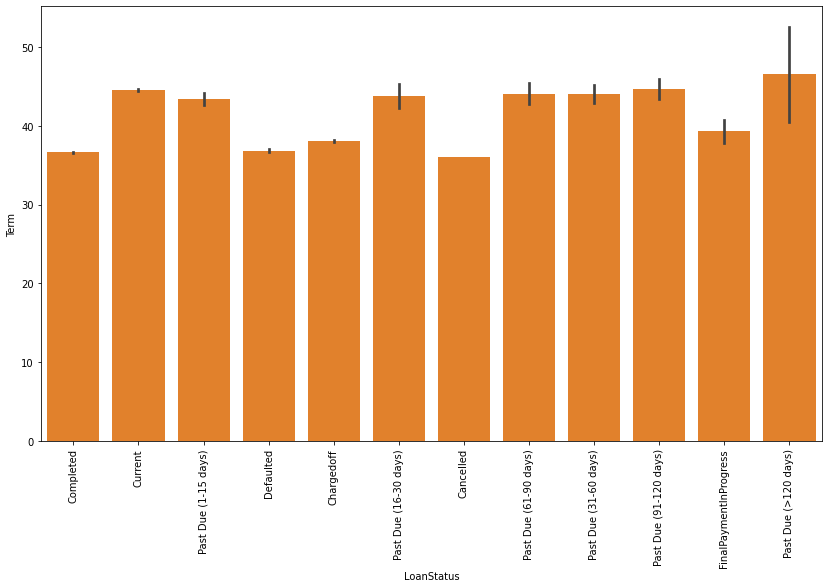

In [24]:
plt.figure(figsize=(14,8))
sb.barplot(data = ploans, x = 'LoanStatus', y = 'Term', color = base_color);
plt.xticks(rotation = 90);

- Most of the loans in the COmpleted status are in the 36 month terms.
- majority of the current loans are on the 60 month term

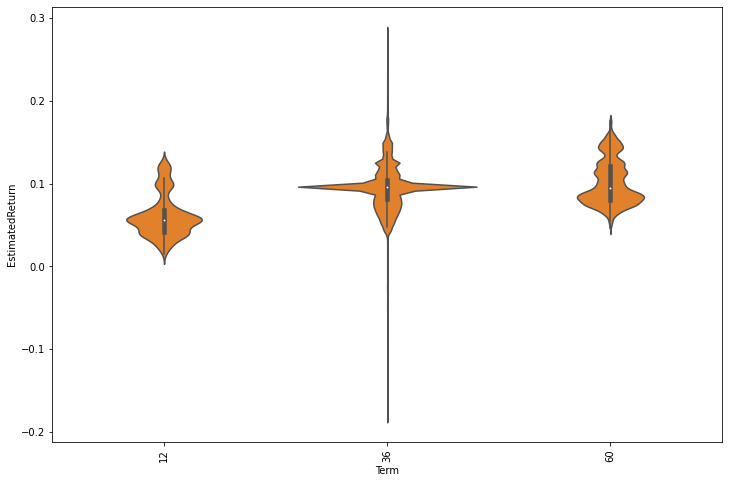

In [25]:
plt.figure(figsize=(12,8))
sb.violinplot(data = ploans, x = 'Term', y = 'EstimatedReturn', color = base_color);
plt.xticks(rotation = 90);

- 36 Months terms loans ahve the highest EstiamtedReturns followed by 60 months term loans

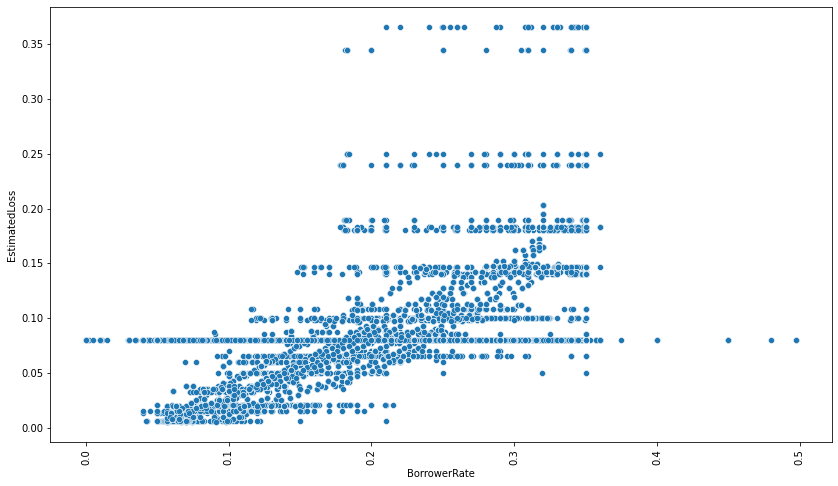

In [26]:
plt.figure(figsize=(14,8))
sb.scatterplot(data = ploans, x = 'BorrowerRate', y = 'EstimatedLoss', x_jitter= 0.5);
plt.xticks(rotation = 90);

- for high borrowerRate, past 0.4, the estiamtedLoss is constant and does not seem to change with increase in BorrowerRate.
- The greatest collection of estiamtedLoss is concentrated between borrowerRates of 0.1 and 0.3

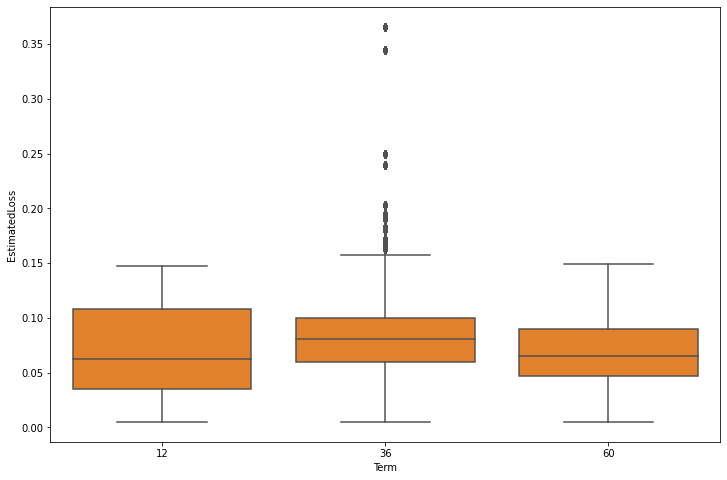

In [27]:
plt.figure(figsize=(12,8))
sb.boxplot(data = ploans, x = 'Term', y = 'EstimatedLoss', color = base_color);

- EstiamtedLoss for loans at 12 month term are low compared ot the same for 36 month Term loans

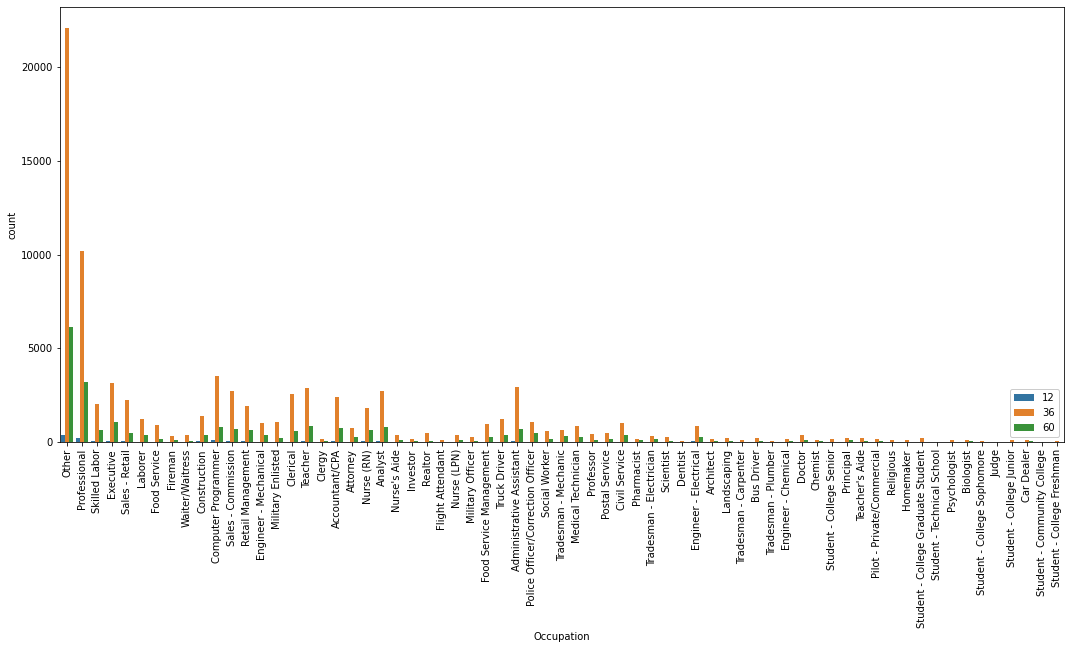

In [28]:
plt.figure(figsize=(18, 8))
ax = sb.countplot(data = ploans, x = 'Occupation', hue = 'Term')
ax.legend(loc = 4, framealpha = 1) # lower right, no transparency
plt.xticks(rotation = 90);

- A large number of 'Other' Occupation is given 36 months Term loans, followed by 'Professional' whcih are ambigous.
- Executives, computer programmers, and construction Occupation clients have a majority fo their loans at 36 month terms.

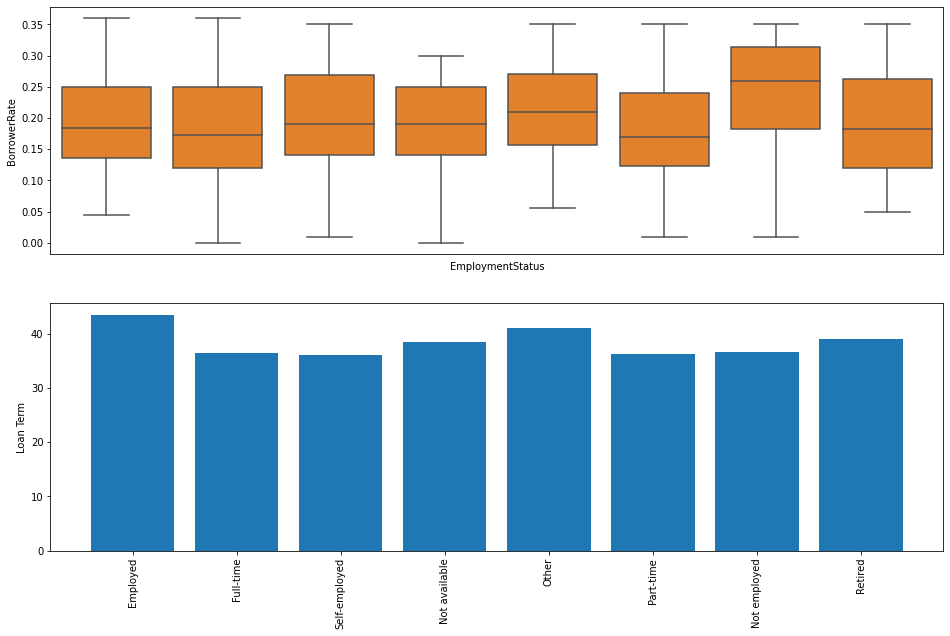

In [29]:
plt.figure(figsize = [16,10])

# plot APR vs employment status
plt.subplot(2,1,1)
sb.boxplot(data = ploans, x = 'EmploymentStatus', y = 'BorrowerRate',color = base_color, 
           order = ploans['EmploymentStatus'].value_counts().index)
plt.xticks([]);

# plot average ProsperRating in each employment status
plt.subplot(2,1,2)
plt.bar(x = ploans['EmploymentStatus'].value_counts().index, 
        height = ploans.groupby('EmploymentStatus').mean()['Term'])
plt.xticks(rotation = 90)
plt.ylabel('Loan Term')
plt.show;


- Not employed has the highest borrowerRates and a moderate Loan term of 36 months.
- Employed individuals ahve a lower BorrowerRate with higher/longer loan terms of upto 60 months.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The borrower rate increases with the term of the loan
> there is a positive correlation between variables, BorrowerRate, borrowerAPR estimatedLoss

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The term is directly correlated with the estimated return from the loans

## Multivariate Exploration


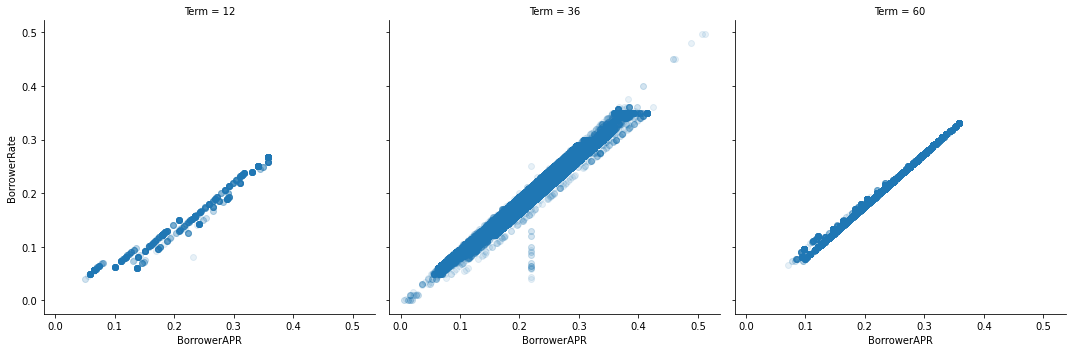

In [30]:
# BorrowerAPR, BorrowerRate vs. Term
g = sb.FacetGrid(data = ploans, col = 'Term', height = 5, margin_titles = True)
g.map(plt.scatter, 'BorrowerAPR', 'BorrowerRate', alpha=0.1);

- The BorrowerRate has a positive correlation wiht the BorrowerAPR for all Loan terms, 12, 36 and 60 months.
- The BorrowerRate and BorrowerAPR are mainly concentrated between 0.1 and 0.4 for 36 & 60 month term loans

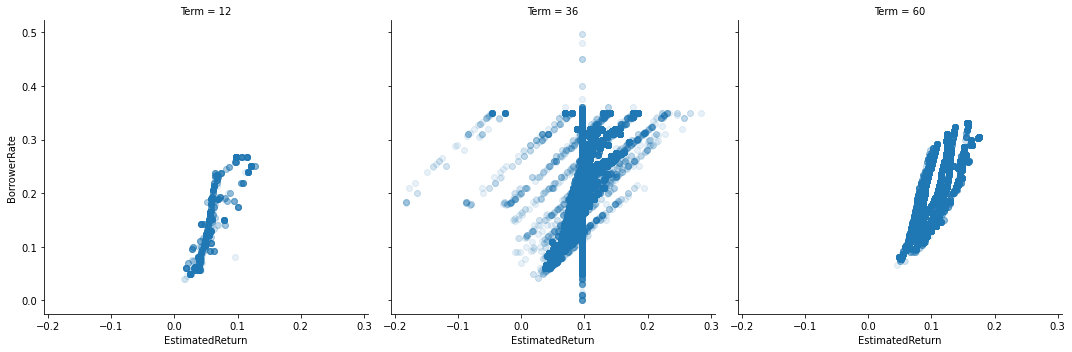

In [31]:
g = sb.FacetGrid(data = ploans, col = 'Term', height = 5, margin_titles = True)
g.map(plt.scatter, 'EstimatedReturn', 'BorrowerRate', alpha=0.1);

- There's little corelation between BorrowerRate, estiamtedReturns and loan terms.
- loans with 36 month term have a wider range of both estiamted returns and borrowerRate

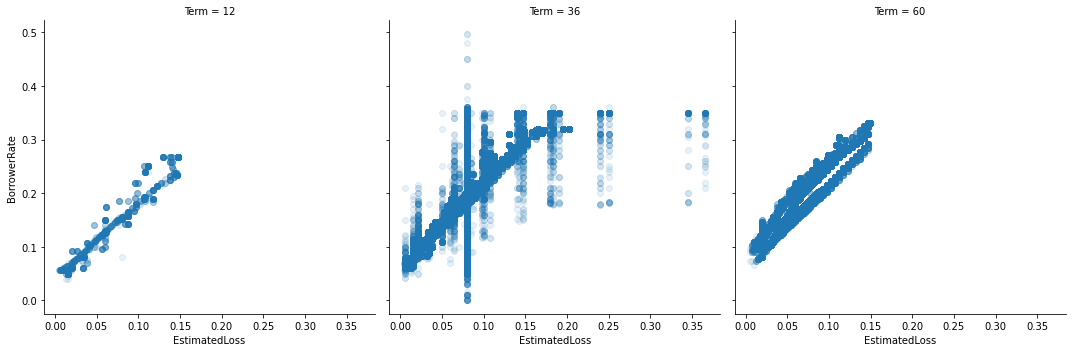

In [32]:
g = sb.FacetGrid(data = ploans, col = 'Term', height = 5,margin_titles = True)
g.map(plt.scatter, 'EstimatedLoss', 'BorrowerRate', alpha=0.1);

- The range of estimatedLoss for loans with 36 months term is wide compared ot the other terms

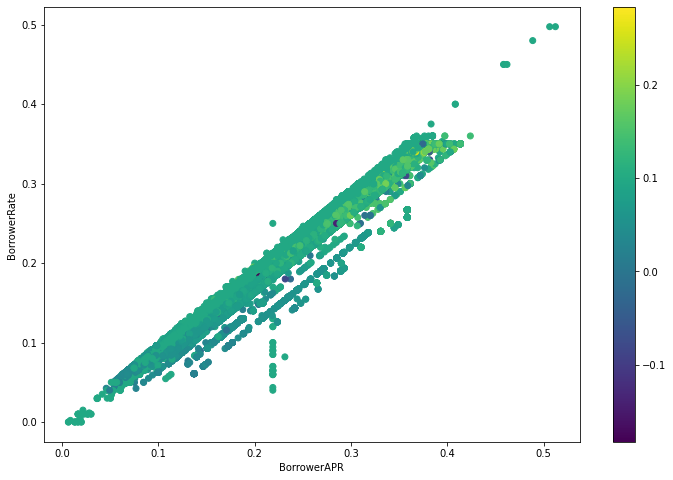

In [33]:
plt.figure(figsize=(12,8))
plt.xlabel('BorrowerAPR')
plt.ylabel('BorrowerRate')
plt.scatter(data = ploans, x = 'BorrowerAPR', y = 'BorrowerRate', c = 'EstimatedReturn')
plt.colorbar();

- There is high positive correlation between BorrowerRate, BorrowerAPR and the estimatedReturn

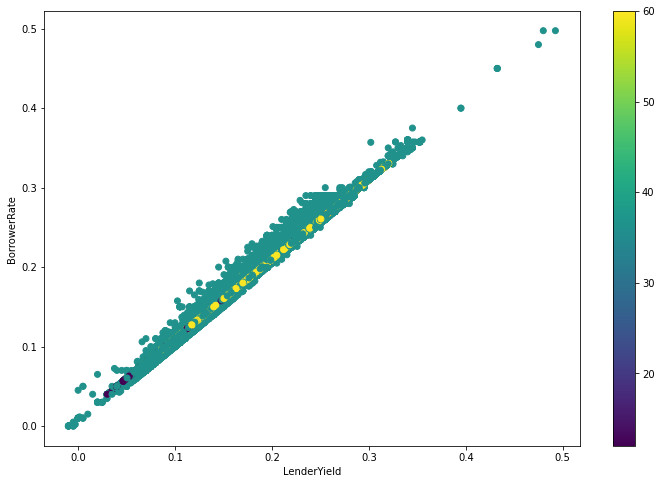

In [34]:
plt.figure(figsize=(12,8))
plt.xlabel('LenderYield')
plt.ylabel('BorrowerRate')
plt.scatter(data = ploans, x = 'LenderYield', y = 'BorrowerRate', c = 'Term')
plt.colorbar();


- A significant positive correlation is noticed between LenderYield, BorrowerRate adn the Term of the loan

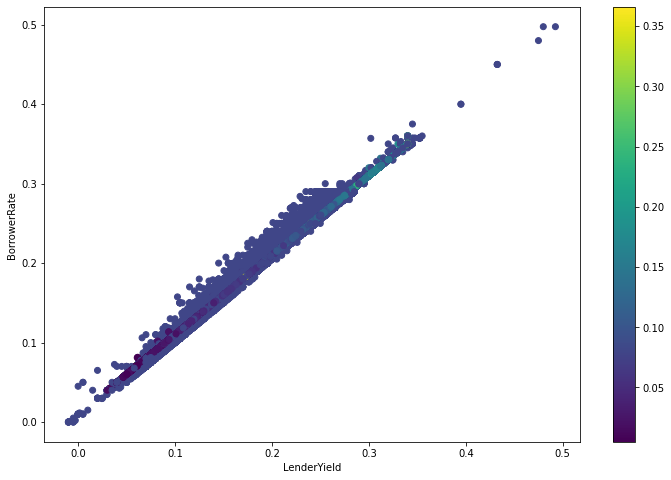

In [35]:
plt.figure(figsize=(12,8))
plt.xlabel('LenderYield')
plt.ylabel('BorrowerRate')
plt.scatter(data = ploans, x = 'LenderYield', y = 'BorrowerRate', c = 'EstimatedLoss')
plt.colorbar();

- There seems to be positive correlation between BorrowerRate, LenderYield and EstimatedLoss

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Estimated Return has a direct correlation with the Borrower Rate and strenghtens with the term of the loan from 36 months. Adverselly, the estimated loss in high with 12 month loan term and 60 months
> Lender Yield and BorrowerRate also tends ot have a positive ocrrelation with Term of the Loans taken.

### Were there any interesting or surprising interactions between features?

> There are fewer loan taken on longer terms (60 months) tehreby lowerign the overall estiamted returns on such loans. Many loans offered have a Borrower Rate and APR at about 0.3-0.4